In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! ls

drive  sample_data


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

In [15]:
ROOTPATH = 'E:/AThesis/Final'
DATAPATH= ROOTPATH+'/training_set'
TRAINPATH = ROOTPATH+'/training_set'
TESTPATH =  ROOTPATH+'/testing_set'
MODELPATH = ROOTPATH+'/model'

In [16]:
two=glob.glob(DATAPATH+'/1.two/*.*')
five=glob.glob(DATAPATH+'/2.five/*.*')
ten=glob.glob(DATAPATH+'/3.ten/*.*')
twenty=glob.glob(DATAPATH+'/4.twenty/*.*')
fifty=glob.glob(DATAPATH+'/5.fifty/*.*')
one_hundred=glob.glob(DATAPATH+'/6.one_hundred/*.*')
two_hundred=glob.glob(DATAPATH+'/7.two_hundred/*.*')
five_hundred=glob.glob(DATAPATH+'/8.five_hundred/*.*')
one_thousand=glob.glob(DATAPATH+'/9.one_thousand/*.*')

In [17]:
print('two: ',len(two))
print('five : ',len(five))
print('ten: ',len(ten))
print('twenty: ',len(twenty))
print('fifty: ',len(fifty))
print('one_hundred: ',len(one_hundred))
print('two_hundred: ',len(two_hundred))
print('five_hundred: ',len(five_hundred))
print('one_thousand: ',len(one_thousand))

two:  600
five :  600
ten:  600
twenty:  600
fifty:  600
one_hundred:  600
two_hundred:  600
five_hundred:  600
one_thousand:  600


In [18]:
dataset_classes=[two,five,ten,twenty,fifty,one_hundred,two_hundred,five_hundred,one_thousand]
total_class=len(dataset_classes)
print('Total dataset class: ',total_class)

Total dataset class:  9


In [19]:
IMAGE_SIZE=224
BATCH_SIZE=16

#pre_processing_training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split=0.2)

training_set = train_datagen.flow_from_directory(
        DATAPATH,
        shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training')


validation_set = train_datagen.flow_from_directory(
        DATAPATH,
         shuffle=True,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation')


Found 4320 images belonging to 9 classes.
Found 1080 images belonging to 9 classes.


In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        TESTPATH,
         shuffle=False,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 575 images belonging to 9 classes.


In [21]:
training_set.class_indices

{'1.two': 0,
 '2.five': 1,
 '3.ten': 2,
 '4.twenty': 3,
 '5.fifty': 4,
 '6.one_hundred': 5,
 '7.two_hundred': 6,
 '8.five_hundred': 7,
 '9.one_thousand': 8}

In [22]:
total_class=len(training_set.class_indices)
print('Number of classes in dataset: ',total_class)

Number of classes in dataset:  9


In [ ]:
from tensorflow.keras.layers import Conv2D,Dense
from tensorflow.keras.regularizers import l2

In [ ]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=64 , kernel_size=3 , strides=2, activation='relu' , input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

cnn.add(Dense(9, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))


In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 111, 111, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 27, 27, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=MODEL_PATH+'SVM_with_CNN.model.best.hdf5', verbose=1 ,save_best_only=True)

In [ ]:
history=cnn.fit(training_set,
                epochs=100,
                validation_data=validation_set,
                callbacks=[checkpointer])

Epoch 1/100
271/271 [==============================] - ETA: 0s - loss: 1.1212 - accuracy: 0.4998
Epoch 1: val_loss improved from inf to 1.04051, saving model to /content/drive/MyDrive/Niloy Banik/modelSVM_with_CNN.model.best.hdf5
271/271 [==============================] - 2923s 11s/step - loss: 1.1212 - accuracy: 0.4998 - val_loss: 1.0405 - val_accuracy: 0.6627
Epoch 2/100
271/271 [==============================] - ETA: 0s - loss: 0.9690 - accuracy: 0.8489
Epoch 2: val_loss improved from 1.04051 to 0.96684, saving model to /content/drive/MyDrive/Niloy Banik/modelSVM_with_CNN.model.best.hdf5
271/271 [==============================] - 83s 306ms/step - loss: 0.9690 - accuracy: 0.8489 - val_loss: 0.9668 - val_accuracy: 0.8484
Epoch 3/100
271/271 [==============================] - ETA: 0s - loss: 0.9276 - accuracy: 0.9395
Epoch 3: val_loss did not improve from 0.96684
271/271 [==============================] - 82s 303ms/step - loss: 0.9276 - accuracy: 0.9395 - val_loss: 0.9839 - val_accurac

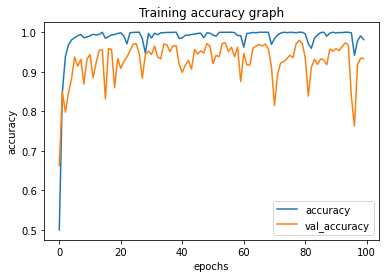

In [ ]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training accuracy graph')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

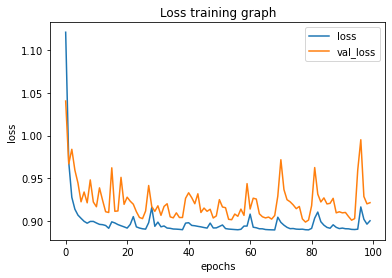

In [ ]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Loss training graph')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

In [ ]:
test_loss,test_accuracy=cnn.evaluate(test_set)
print('Test Loss: ',test_loss)
print('Test Accuracy: ',test_accuracy)

In [ ]:
print('Accuracy of the model is : ',test_accuracy*100)

Accuracy of the model is :  93.73912811279297


In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
predicted_result=cnn.predict(test_set)
predicted_result[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

In [ ]:
test_classes=test_set.classes
test_classes

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

In [ ]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

In [ ]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

In [ ]:

export_path_keras = "/content/drive/MyDrive/Model/Model_2_SVM_with_CNN.h5"
print(export_path_keras)
cnn.save(export_path_keras)

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

In [ ]:
print(len(reload_model.weights))
print(reload_model.output_shape)

In [ ]:
reload_model.layers

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import PIL
import glob
import pyttsx3 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [24]:

export_path_keras = "Final Thesis/Saved Model/1.SVM_with_CNN1.h5"


In [25]:
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 111, 111, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 55, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0

In [28]:
predicted_result=reload_model.predict(test_set)
predicted_result[:5]

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [29]:
predicted_class=np.argmax(predicted_result,axis=-1)
predicted_class[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [30]:
test_classes=test_set.classes
test_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_classes,predicted_class)
print(cm)

[[72  0  0  0  0  0  0  0  0]
 [ 0 33  0  0 27  0  0  0  0]
 [ 0  0 60  0  0  0  0  0  0]
 [ 0  0  0 58  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0]
 [ 0  0  0  0  0 72  0  0  0]
 [ 0  0  0  0  0  0 47  0  0]
 [ 0  0  0  0  7  0  0 65  0]
 [ 0  0  0  0  0  0  0  0 72]]


<AxesSubplot:>

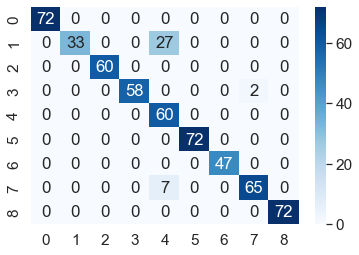

In [33]:
import seaborn as sns
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,fmt='d',cmap="Blues")

In [34]:
from sklearn.metrics import accuracy_score
print('Accuracy score: ',accuracy_score(test_classes,predicted_class))

Accuracy score:  0.9373913043478261


In [35]:
from sklearn.metrics import classification_report
print('Classification Report \n',classification_report(test_classes,predicted_class))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      0.55      0.71        60
           2       1.00      1.00      1.00        60
           3       1.00      0.97      0.98        60
           4       0.64      1.00      0.78        60
           5       1.00      1.00      1.00        72
           6       1.00      1.00      1.00        47
           7       0.97      0.90      0.94        72
           8       1.00      1.00      1.00        72

    accuracy                           0.94       575
   macro avg       0.96      0.94      0.93       575
weighted avg       0.96      0.94      0.94       575



In [1]:
import os
import pyttsx3 
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2
import time
import PIL
import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from playsound import playsound
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [3]:

export_path_keras = "Final Thesis/Saved Model/1.SVM_with_CNN1.h5"
model_path=export_path_keras
reload_model=load_model(model_path)
reload_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 111, 111, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 55, 55, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0

In [4]:
def noteclass(cls):
    txt=pyttsx3.init()
    if cls==0:
        ans="Two Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==1:
        ans="Five Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==2:
        ans="Ten Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==3:
        ans="Twenty Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==4:
        ans="Fifty Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==5:
        ans="One Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==6:
        ans="Two Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    elif cls==7:
        ans="Five Hundred Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    else:
        ans="One Thousand Taka"
        print(ans)
        txt.say(ans)
        txt.runAndWait()
    

Five Hundred Taka


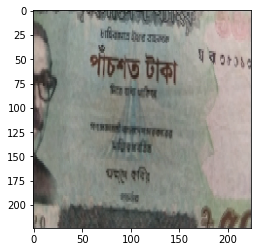

In [5]:
#""WIN_20220326_11_18_21_Pro"""
random_image=image.load_img('E:/AThesis/Final/testing_set/8.five_hundred/five_hundred31.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

Five Taka


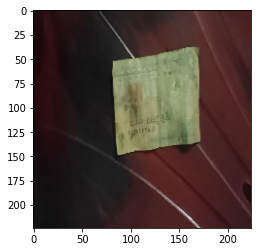

In [6]:
#""E:\AThesis\anotation\anotated img\2\21493.png"""
random_image=image.load_img('E:/AThesis/anotation/anotated img/2/21493.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))


Two Taka


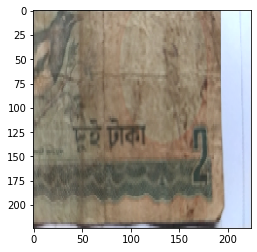

In [7]:
random_image=image.load_img('E:/AThesis/Final/testing_set/1.two/two1.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

Twenty Taka


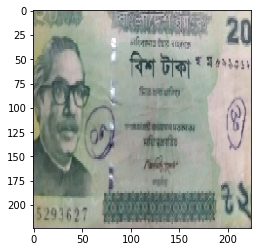

In [8]:
random_image=image.load_img('E:/AThesis/Final/testing_set/4.twenty/twenty5.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
noteclass(np.argmax(predicted_class))
#print('True classification')

Fifty Taka


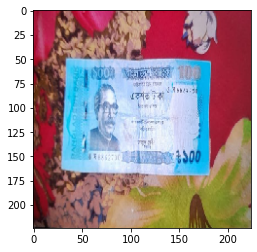

In [9]:
#""WIN_20220326_11_18_21_Pro"""
random_image=image.load_img('C:/Users/Niloy/Pictures/Camera Roll/100.png',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))

One Hundred Taka


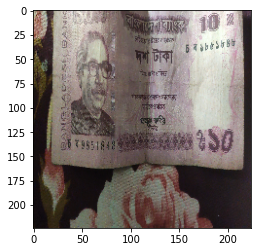

In [10]:

#""WIN_20220326_11_18_21_Pro"""
random_image=image.load_img('C:/Users/Niloy/Pictures/Camera Roll/WIN_20220327_14_17_14_Pro.jpg',target_size=(224,224))
plt.imshow(random_image)
random_image=image.img_to_array(random_image)
test_image=random_image.reshape((1,)+random_image.shape)
test_image=test_image/255.0
#print(test_image.shape)
predicted_class=reload_model.predict(test_image)
#print(predicted_class)
#print('True classification')
noteclass(np.argmax(predicted_class))